In [1]:
# import os
# os.getcwd()
# os.chdir('/home/chtung/project_MC')

import numpy as np
import time
from tqdm import tqdm, trange
from WLM import WLChain
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat

<Figure size 1152x1152 with 0 Axes>

In [2]:
## Chain parameters
# Coordinate of C atoms in each unit
# unit_C = load('b_c.dat')';
unit_C = np.zeros((3,1))

# Degree of polymerization
N_backbone = 5000

# Chain stiffness (placeholder)
a_backbone = 1

# Unit persistence
lambda_backbone = 1

# Call WLChain class
chain = WLChain(N_backbone,a_backbone,lambda_backbone,unit_C)
chain.apply_SA = 1
chain.d_exc = 0.1
chain.f = 0.0

kappa_list = np.array([50])
epsilon_list = [0]

lm=[(0,0),(2,0),(4,0)]

parameters_list = []
S_q_lm_list_param = []
g_r_lm_list_param = []
for kappa in kappa_list:
    for epsilon in epsilon_list:
        parameters_list.append([kappa, epsilon])
        n_sample = 128
        data = loadmat("./mat/sq_lm_{}_{}_{}.mat".format(n_sample,kappa,epsilon))

In [3]:
S_q_lm_list_param = data['S_q_lm_list_param']
g_r_lm_list_param = data['g_r_lm_list_param']
rr = data['rr'][0]
qq = data['qq'][0]

/SNS/users/ccu/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/SNS/users/ccu/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


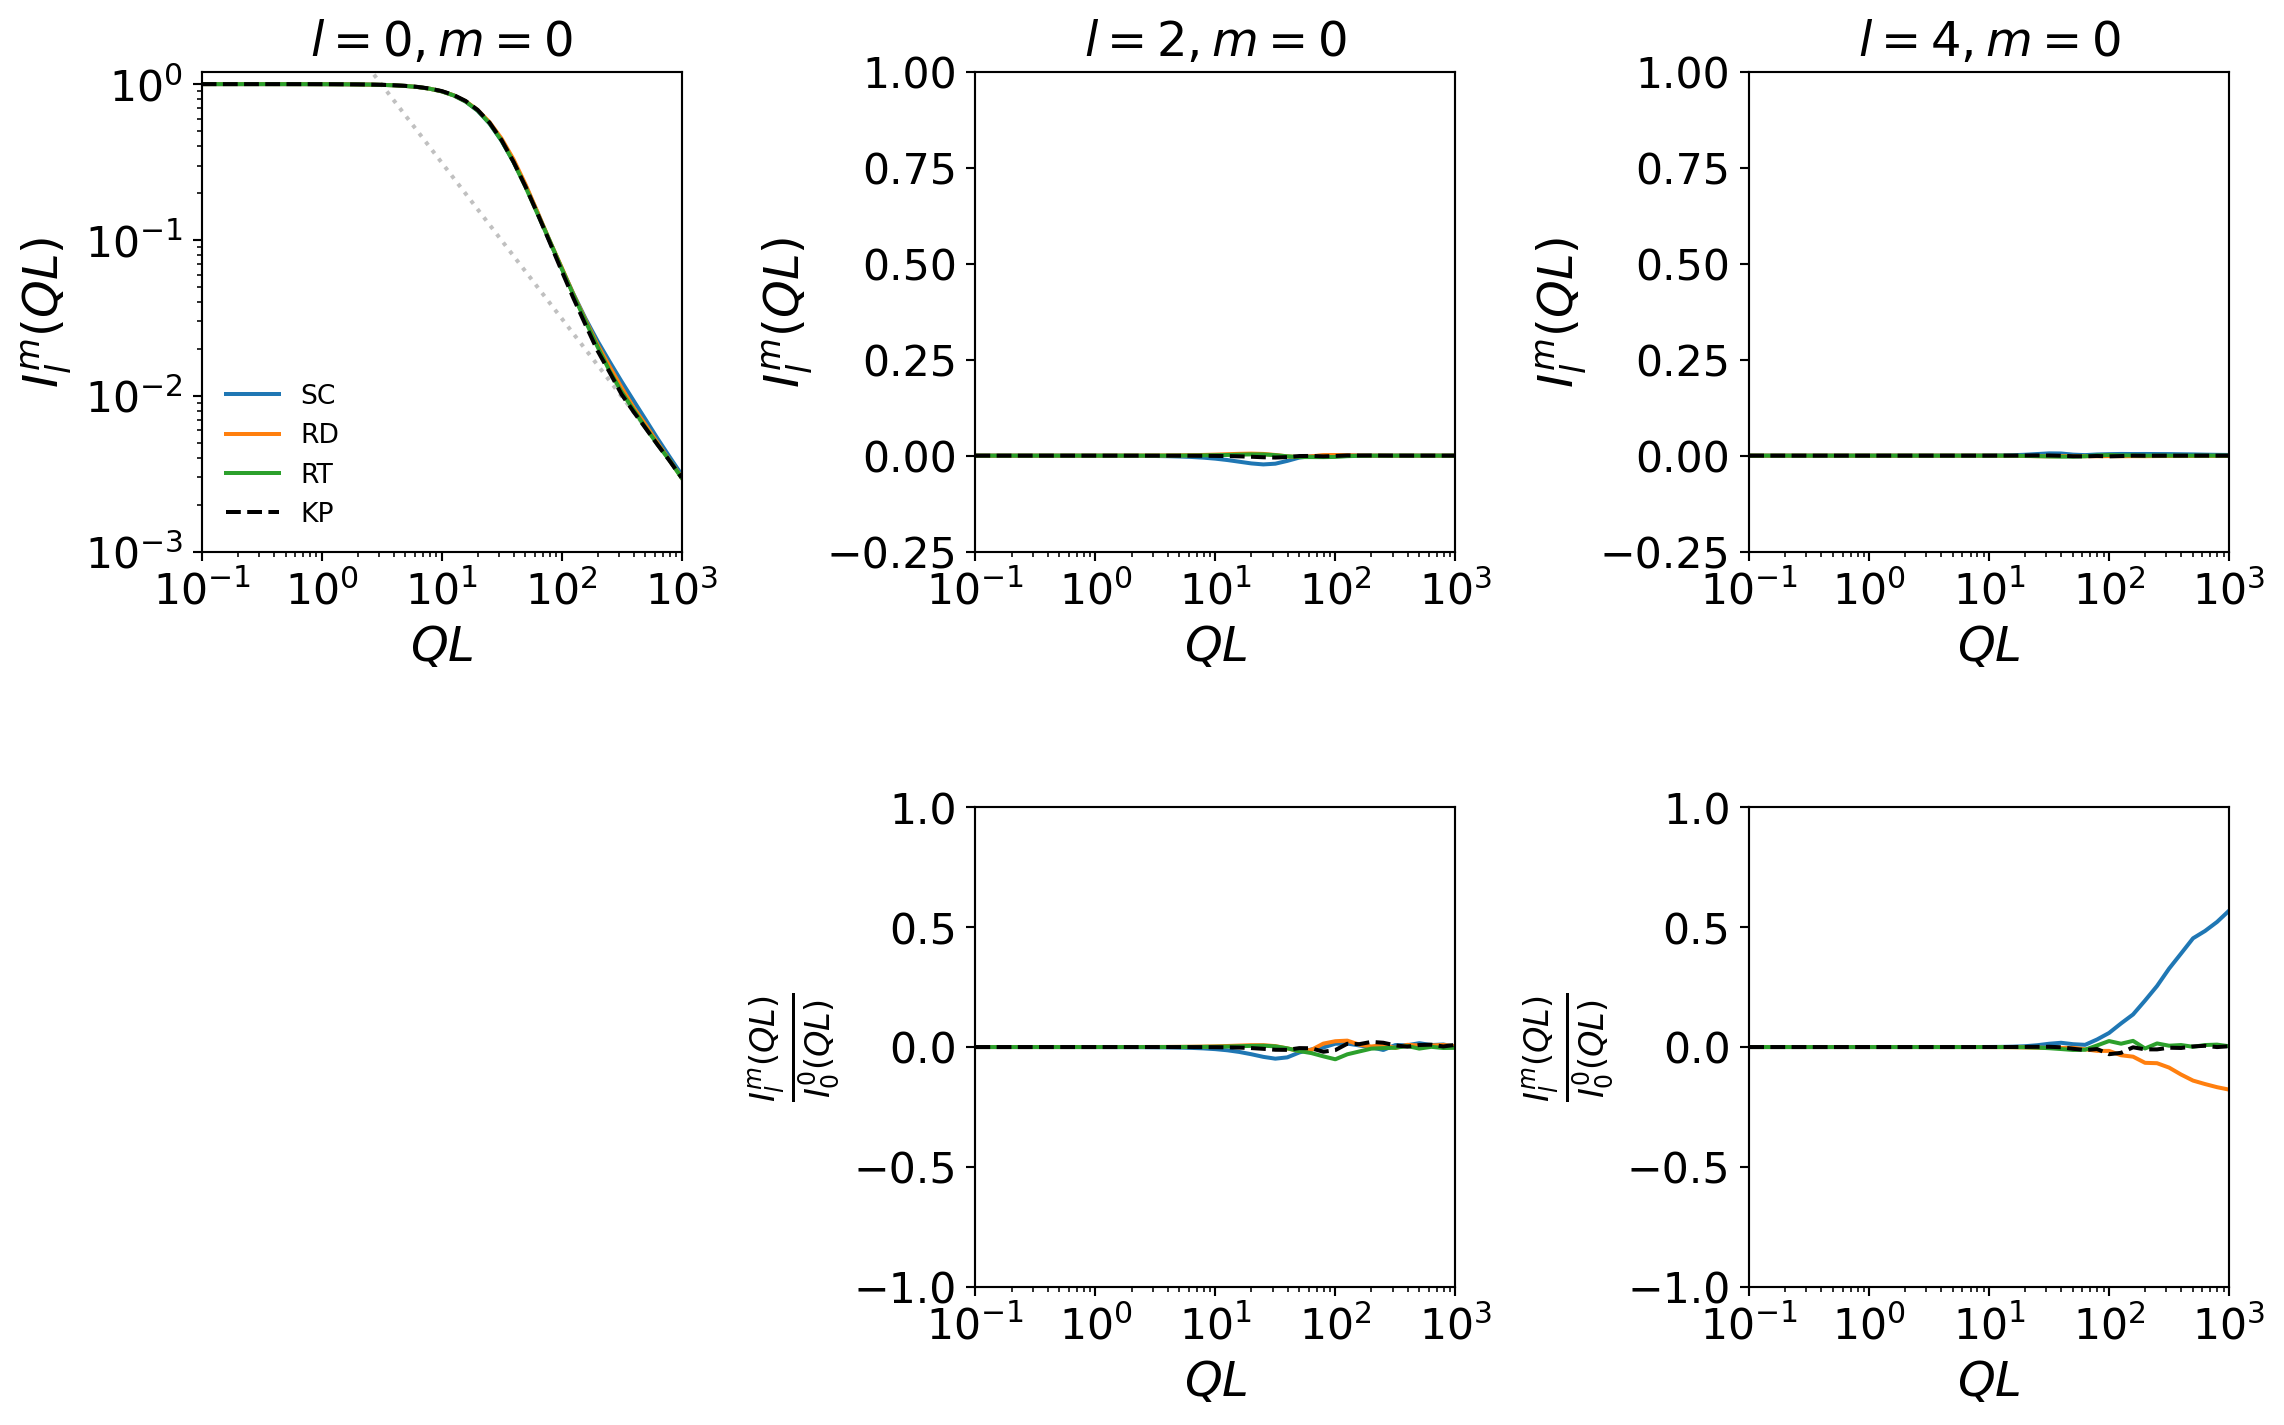

In [4]:
fig = plt.figure(figsize=(12, 8),dpi=192)
colors  = ['C0','C1','C2','C3','C4']

for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    for k, lm in enumerate([(0,0),(2,0),(4,0)]):
        ax = fig.add_subplot(2,3,k+1)
        for j, grid in enumerate(['SC','RD','RT']):
            S_q_lm_list = S_q_lm_list_param[i][j,:]
            S_q_lm = S_q_lm_list[:,k]
            
            ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi), label=grid)
                
        j=3
        grid = 'KP'
        S_q_lm_list = S_q_lm_list_param[i][j,:]
        S_q_lm = S_q_lm_list[:,k]
        
        ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi),'--k', label=grid)
        ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$QL$',fontsize=18)
        ax.set_ylabel(r'$I_{l}^{m}(QL)$',fontsize=18)
        ax.set_xscale('log')
        ax.set_xlim([1e-1,1e3])
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=16)
        ax.set_ylim([-0.25,1])
        if lm[0] == 0:
            if i==len(parameters_list)-1:
                ax.plot(qq*N_backbone,np.pi/(qq*N_backbone),':',color='#C0C0C0',zorder=-10)
                ax.set_yscale('log')
                ax.set_ylim([1e-3,1.2])
                ax.set_xlim([1e-1,1e3])
                ax.legend(frameon=False, loc='lower left')
        ax.set_box_aspect(1)

for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    for k, lm in enumerate([(2,0),(4,0)]):
        ax = fig.add_subplot(2,3,k+5)
        for j, grid in enumerate(['SC','RD','RT']):
            S_q_lm_list = S_q_lm_list_param[i][j,:]
            S_q_00 = S_q_lm_list[:,0]
            S_q_lm = S_q_lm_list[:,k+1]
            
            ax.plot(qq*N_backbone,S_q_lm/S_q_00, color=colors[j])
                
        j=3
        S_q_lm_list = S_q_lm_list_param[i][j,:]
        S_q_lm = S_q_lm_list[:,k+1]
        S_q_00 = S_q_lm_list[:,0]
        
        ax.plot(qq*N_backbone,S_q_lm/S_q_00,'--k')
        # ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$QL$',fontsize=18)
        ax.set_ylabel(r'$\frac{I_{l}^m(QL)}{I_{0}^0(QL)}$',fontsize=18)
        ax.set_xscale('log')
        ax.set_xlim([1e-1,1e3])
        ax.set_ylim([-1,1])
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=16)
        ax.set_box_aspect(1)
            
plt.tight_layout()


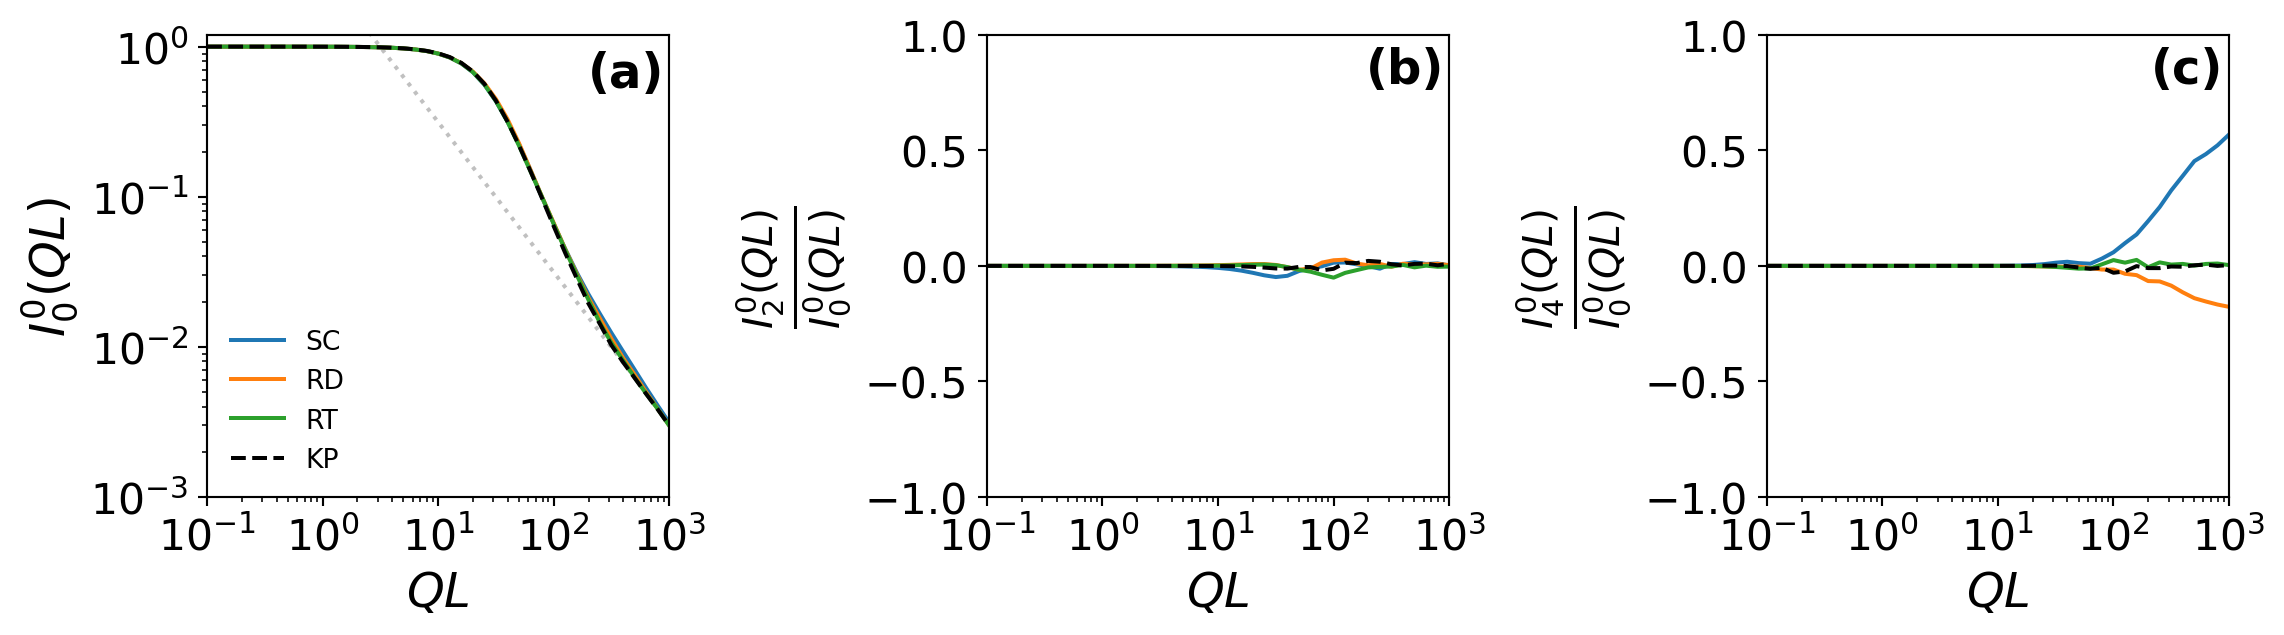

In [5]:
fig = plt.figure(figsize=(12, 8),dpi=192)
colors  = ['C0','C1','C2','C3','C4']

for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    for k, lm in enumerate([(0,0)]):
        ax = fig.add_subplot(1,3,k+1)
        for j, grid in enumerate(['SC','RD','RT']):
            S_q_lm_list = S_q_lm_list_param[i][j,:]
            S_q_lm = S_q_lm_list[:,k]
            
            ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi), label=grid)
                
        j=3
        grid = 'KP'
        S_q_lm_list = S_q_lm_list_param[i][j,:]
        S_q_lm = S_q_lm_list[:,k]
        
        ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi),'--k', label=grid)
        # ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$QL$',fontsize=18)
        ax.set_ylabel(r'$I_{0}^{0}(QL)$',fontsize=18)
        ax.set_xscale('log')
        ax.set_xlim([1e-1,1e3])
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=16)
        ax.set_ylim([-0.25,1])
        if lm[0] == 0:
            if i==len(parameters_list)-1:
                ax.plot(qq*N_backbone,np.pi/(qq*N_backbone),':',color='#C0C0C0',zorder=-10)
                ax.set_yscale('log')
                ax.set_ylim([1e-3,1.2])
                ax.set_xlim([1e-1,1e3])
                ax.legend(frameon=False, loc='lower left')
        ax.set_box_aspect(1)
        ax.text(900, 0.95, "(a)", fontsize=18, fontweight='bold', va='top', ha='right', color='k')


panels = ["(b)","(c)"]
ylabel_list = [r'$\frac{I_{2}^0(QL)}{I_{0}^0(QL)}$',r'$\frac{I_{4}^0(QL)}{I_{0}^0(QL)}$']
for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    for k, lm in enumerate([(2,0),(4,0)]):
        ax = fig.add_subplot(1,3,k+2)
        for j, grid in enumerate(['SC','RD','RT']):
            S_q_lm_list = S_q_lm_list_param[i][j,:]
            S_q_00 = S_q_lm_list[:,0]
            S_q_lm = S_q_lm_list[:,k+1]
            
            ax.plot(qq*N_backbone,S_q_lm/S_q_00, color=colors[j])
                
        j=3
        S_q_lm_list = S_q_lm_list_param[i][j,:]
        S_q_lm = S_q_lm_list[:,k+1]
        S_q_00 = S_q_lm_list[:,0]
        
        ax.plot(qq*N_backbone,S_q_lm/S_q_00,'--k')
        # ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$QL$',fontsize=18)
        ax.set_ylabel(ylabel_list[k],fontsize=22)
        ax.set_xscale('log')
        ax.set_xlim([1e-1,1e3])
        ax.set_ylim([-1,1])
        ax.text(900, 0.95, panels[k], fontsize=18, fontweight='bold', va='top', ha='right', color='k')
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=16)
        ax.set_box_aspect(1)
            
plt.tight_layout()


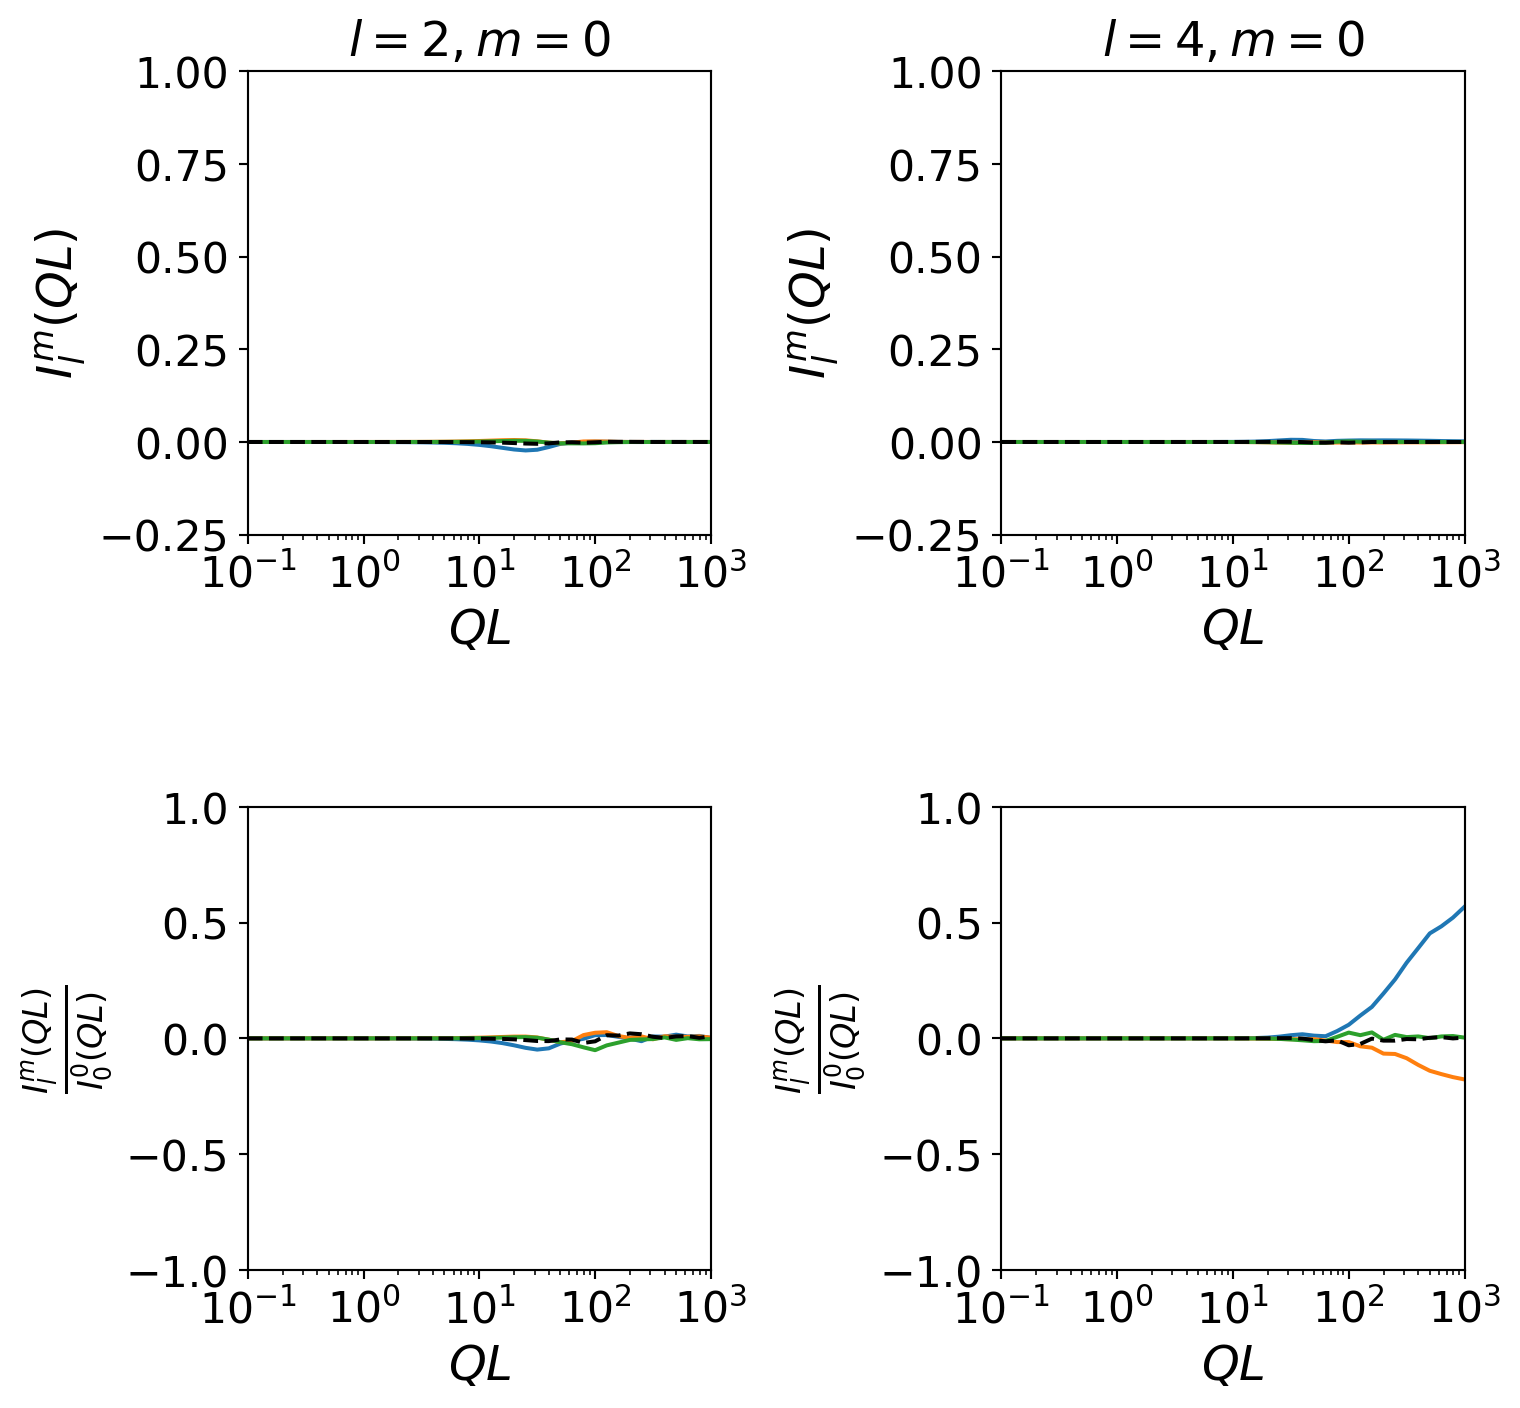

In [6]:
fig = plt.figure(figsize=(8, 8),dpi=192)
colors  = ['C0','C1','C2','C3','C4']

for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    for k, lm in enumerate([(2,0),(4,0)]):
        ax = fig.add_subplot(2,2,k+1)
        for j, grid in enumerate(['SC','RD','RT']):
            S_q_lm_list = S_q_lm_list_param[i][j,:]
            S_q_lm = S_q_lm_list[:,k+1]
            
            ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi), label=grid)
                
        j=3
        grid = 'KP'
        S_q_lm_list = S_q_lm_list_param[i][j,:]
        S_q_lm = S_q_lm_list[:,k+1]
        
        ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi),'--k', label=grid)
        ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$QL$',fontsize=18)
        ax.set_ylabel(r'$I_{l}^{m}(QL)$',fontsize=18)
        ax.set_xscale('log')
        ax.set_xlim([1e-1,1e3])
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=16)
        ax.set_ylim([-0.25,1])
        if lm[0] == 0:
            if i==len(parameters_list)-1:
                ax.plot(qq*N_backbone,np.pi/(qq*N_backbone),':',color='#C0C0C0',zorder=-10)
                ax.set_yscale('log')
                ax.set_ylim([1e-3,1.2])
                ax.set_xlim([1e-1,1e3])
                ax.legend(frameon=False, loc='lower left')
        ax.set_box_aspect(1)

for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    for k, lm in enumerate([(2,0),(4,0)]):
        ax = fig.add_subplot(2,2,k+3)
        for j, grid in enumerate(['SC','RD','RT']):
            S_q_lm_list = S_q_lm_list_param[i][j,:]
            S_q_00 = S_q_lm_list[:,0]
            S_q_lm = S_q_lm_list[:,k+1]
            
            ax.plot(qq*N_backbone,S_q_lm/S_q_00, color=colors[j])
                
        j=3
        S_q_lm_list = S_q_lm_list_param[i][j,:]
        S_q_lm = S_q_lm_list[:,k+1]
        S_q_00 = S_q_lm_list[:,0]
        
        ax.plot(qq*N_backbone,S_q_lm/S_q_00,'--k')
        # ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$QL$',fontsize=18)
        ax.set_ylabel(r'$\frac{I_{l}^m(QL)}{I_{0}^0(QL)}$',fontsize=18)
        ax.set_xscale('log')
        ax.set_xlim([1e-1,1e3])
        ax.set_ylim([-1,1])
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=16)
        ax.set_box_aspect(1)
            
plt.tight_layout()


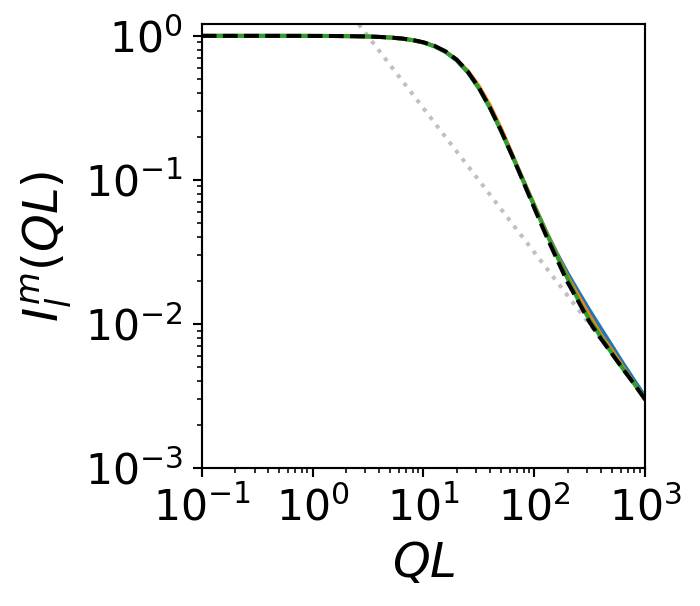

In [7]:
fig = plt.figure(figsize=(3, 3),dpi=192)
colors  = ['C0','C1','C2','C3','C4']

for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    for k, lm in enumerate([(0,0)]):
        ax = fig.add_subplot(1,1,1)
        for j, grid in enumerate(['SC','RD','RT']):
            S_q_lm_list = S_q_lm_list_param[i][j,:]
            S_q_lm = S_q_lm_list[:,k]
            
            ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi), label=grid)
                
        j=3
        grid = 'KP'
        S_q_lm_list = S_q_lm_list_param[i][j,:]
        S_q_lm = S_q_lm_list[:,k]
        
        ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi),'--k', label=grid)
        # ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$QL$',fontsize=18)
        ax.set_ylabel(r'$I_{l}^{m}(QL)$',fontsize=18)
        ax.set_xscale('log')
        ax.set_xlim([1e-1,1e3])
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=16)
        ax.set_ylim([-0.25,1])

        ax.plot(qq*N_backbone,np.pi/(qq*N_backbone),':',color='#C0C0C0',zorder=-10)
        ax.set_yscale('log')
        ax.set_ylim([1e-3,1.2])
        ax.set_xlim([1e-1,1e3])
        # ax.legend(frameon=False, loc='lower left')
        ax.set_box_aspect(1)

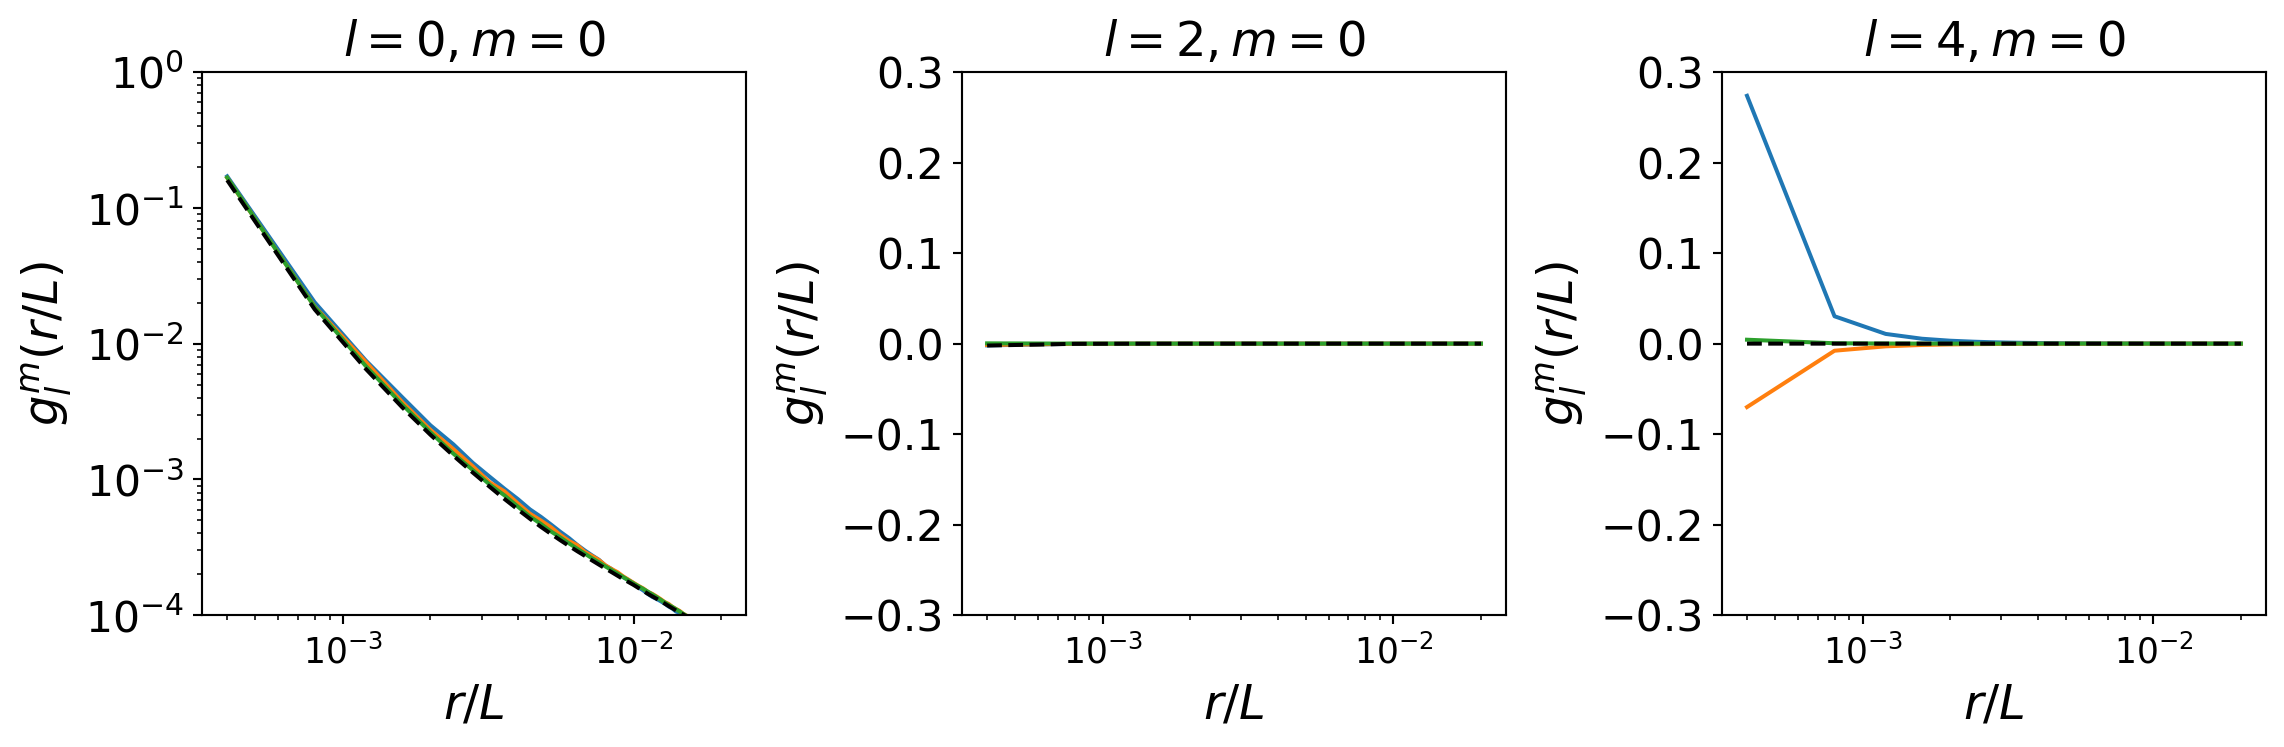

In [8]:
fig = plt.figure(figsize=(12, 8),dpi=192)
colors  = ['C0','C1','C2','C3','C4']

for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    for k, lm in enumerate([(0,0),(2,0),(4,0)]):
        ax = fig.add_subplot(2,3,k+1)
        for j, grid in enumerate(['SC','RD','RT']):
            g_r_lm_list = g_r_lm_list_param[i][j,:]
            g_r_lm = g_r_lm_list[:,k]
            
            ax.plot(rr[1:]/N_backbone,g_r_lm[1:]*np.sqrt(4*np.pi))
                
        j=3
        g_r_lm_list = g_r_lm_list_param[i][j,:]
        g_r_lm = g_r_lm_list[:,k]
        
        ax.plot(rr[1:]/N_backbone,g_r_lm[1:]*np.sqrt(4*np.pi), '--k')
        ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$r/L$',fontsize=18)
        ax.set_ylabel(r'$g_{l}^{m}(r/L)$',fontsize=18)
        ax.set_xscale('log')
        ax.set_ylim([-0.3,0.3])
        
        if k==0:
            ax.set_yscale('log')
            ax.set_ylim([1e-4,1])
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=13)
        ax.set_box_aspect(1)
            
plt.tight_layout()


## Affine deformation

### zz

[2 0]
[4 0]
[6 0]


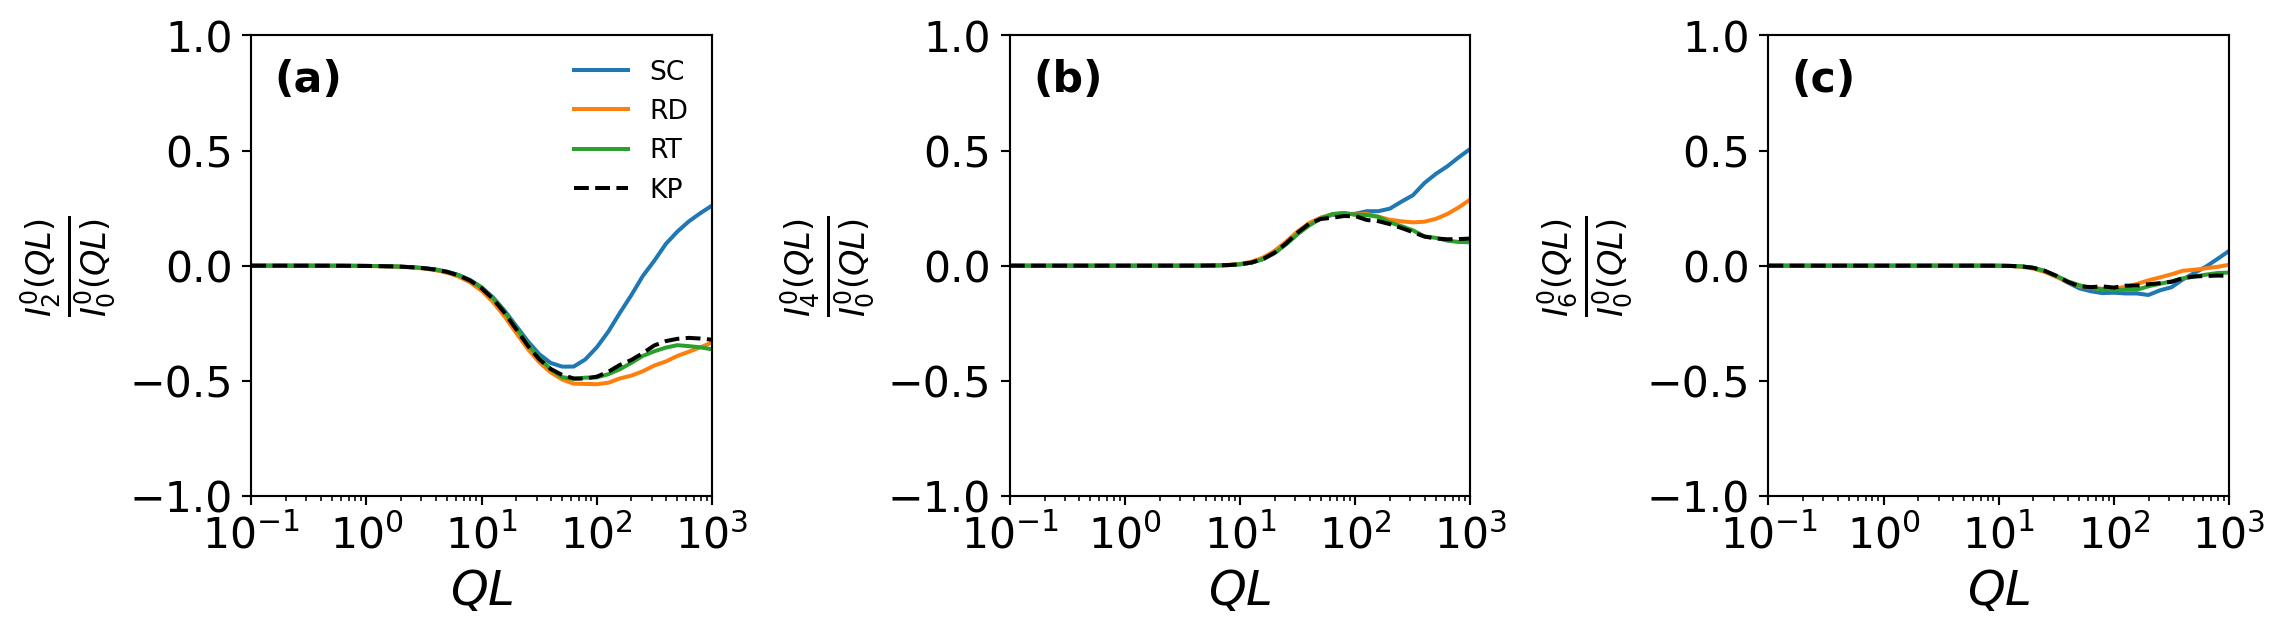

In [9]:
fig = plt.figure(figsize=(12, 8),dpi=192)
colors  = ['C0','C1','C2','C3','C4']

parameters_list = []
S_q_lm_list_param = []
g_r_lm_list_param = []
for kappa in kappa_list:
    for epsilon in epsilon_list:
        parameters_list.append([kappa, epsilon])
        n_sample = 512
        data = loadmat("./mat/sq_lm_zz_1.0_{}_{}_{}.mat".format(n_sample,kappa,epsilon))

S_q_lm_list_param = data['S_q_lm_list_param']
g_r_lm_list_param = data['g_r_lm_list_param']
rr = data['rr'][0]
qq = data['qq'][0]
lm_list = data['lm']

# for i, params in enumerate(parameters_list):
#     kappa = params[0]
#     epsilon = params[1]
#     for k, lm in enumerate(lm_list[1:]):
#         print(lm)
#         ax = fig.add_subplot(2,3,k+1)
#         for j, grid in enumerate(['SC','RD','RT']):
#             S_q_lm_list = S_q_lm_list_param[i][j,:]
#             S_q_lm = S_q_lm_list[:,k+1]
            
#             ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi), label=grid)
                
#         j=3
#         grid = 'KP'
#         S_q_lm_list = S_q_lm_list_param[i][j,:]
#         S_q_lm = S_q_lm_list[:,k+1]
        
#         ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi),'--k', label=grid)
#         ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
#         ax.set_xlabel(r'$QL$',fontsize=18)
#         ax.set_ylabel(r'$I_{l}^{m}(QL)$',fontsize=18)
#         ax.set_xscale('log')
#         ax.set_xlim([1e-1,1e3])
        
#         ax.tick_params(axis='y', which='major', labelsize=16)
#         ax.tick_params(axis='x', which='major', labelsize=16)
#         ax.set_ylim([-0.25,1])
#         if lm[0] == 0:
#             if i==len(parameters_list)-1:
#                 ax.plot(qq*N_backbone,np.pi/(qq*N_backbone),':',color='#C0C0C0',zorder=-10)
#                 ax.set_yscale('log')
#                 ax.set_ylim([1e-3,1.2])
#                 ax.set_xlim([1e-1,1e3])
#                 ax.legend(frameon=False, loc='lower left')
#         ax.set_box_aspect(1)

panels = ["(a)","(b)","(c)","(d)","(e)","(f)"]
titles = [r'$\frac{I_{2}^0(QL)}{I_{0}^0(QL)}$',r'$\frac{I_{4}^0(QL)}{I_{0}^0(QL)}$',r'$\frac{I_{6}^0(QL)}{I_{0}^0(QL)}$']
for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    position = 0
    for k, lm in enumerate(lm_list[1:]):
        print(lm)
        # if lm[0] > 2:
        #     continue
        position += 1
        ax = fig.add_subplot(2,3,position)
        # ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        for j, grid in enumerate(['SC','RD','RT']):
            S_q_lm_list = S_q_lm_list_param[i][j,:]
            S_q_00 = S_q_lm_list[:,0]
            S_q_lm = S_q_lm_list[:,k+1]
            
            ax.plot(qq*N_backbone,S_q_lm/S_q_00, color=colors[j], label=grid)
                
        j=3
        S_q_lm_list = S_q_lm_list_param[i][j,:]
        S_q_lm = S_q_lm_list[:,k+1]
        S_q_00 = S_q_lm_list[:,0]
        
        ax.plot(qq*N_backbone,S_q_lm/S_q_00,'--k', label="KP")
        ax.text(0.05, 0.95, panels[position-1], transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')
        # ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$QL$',fontsize=18)
        ax.set_ylabel(titles[k],fontsize=18)
        ax.set_xscale('log')
        ax.set_xlim([1e-1,1e3])
        ax.set_ylim([-1,1])
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=16)
        ax.set_box_aspect(1)
        if position == 1:
            ax.legend(frameon=False)
            
plt.tight_layout()


### xz

[2 0]
[2 2]
[ 2 -2]


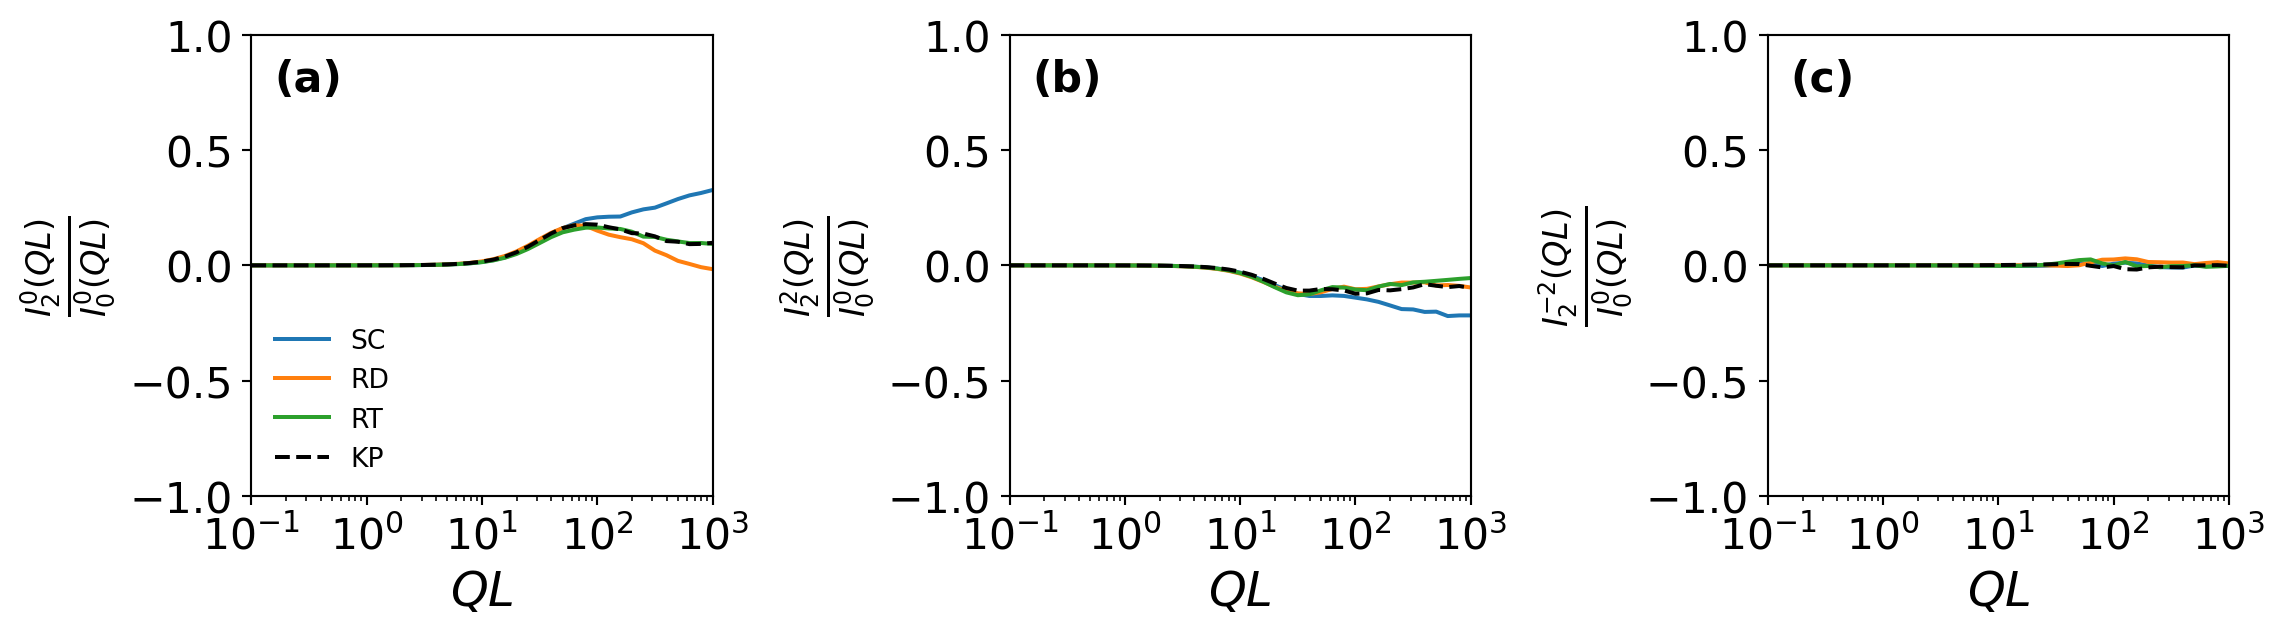

In [10]:
fig = plt.figure(figsize=(12, 8),dpi=192)
colors  = ['C0','C1','C2','C3','C4']

parameters_list = []
S_q_lm_list_param = []
g_r_lm_list_param = []
for kappa in kappa_list:
    for epsilon in epsilon_list:
        parameters_list.append([kappa, epsilon])
        n_sample = 512
        data = loadmat("./mat/sq_lm_xz_1.0_{}_{}_{}.mat".format(n_sample,kappa,epsilon))

S_q_lm_list_param = data['S_q_lm_list_param']
g_r_lm_list_param = data['g_r_lm_list_param']
rr = data['rr'][0]
qq = data['qq'][0]
lm_list = data['lm']

# for i, params in enumerate(parameters_list):
#     kappa = params[0]
#     epsilon = params[1]
#     for k, lm in enumerate(lm_list[1:]):
#         print(lm)
#         ax = fig.add_subplot(2,3,k+1)
#         for j, grid in enumerate(['SC','RD','RT']):
#             S_q_lm_list = S_q_lm_list_param[i][j,:]
#             S_q_lm = S_q_lm_list[:,k+1]
            
#             ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi), label=grid)
                
#         j=3
#         grid = 'KP'
#         S_q_lm_list = S_q_lm_list_param[i][j,:]
#         S_q_lm = S_q_lm_list[:,k+1]
        
#         ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi),'--k', label=grid)
#         ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
#         ax.set_xlabel(r'$QL$',fontsize=18)
#         ax.set_ylabel(r'$I_{l}^{m}(QL)$',fontsize=18)
#         ax.set_xscale('log')
#         ax.set_xlim([1e-1,1e3])
        
#         ax.tick_params(axis='y', which='major', labelsize=16)
#         ax.tick_params(axis='x', which='major', labelsize=16)
#         ax.set_ylim([-0.25,1])
#         if lm[0] == 0:
#             if i==len(parameters_list)-1:
#                 ax.plot(qq*N_backbone,np.pi/(qq*N_backbone),':',color='#C0C0C0',zorder=-10)
#                 ax.set_yscale('log')
#                 ax.set_ylim([1e-3,1.2])
#                 ax.set_xlim([1e-1,1e3])
#                 ax.legend(frameon=False, loc='lower left')
#         ax.set_box_aspect(1)

panels = ["(a)","(b)","(c)","(d)","(e)","(f)"]
titles = [r'$\frac{I_{2}^0(QL)}{I_{0}^0(QL)}$',r'$\frac{I_{2}^2(QL)}{I_{0}^0(QL)}$',r'$\frac{I_{2}^{-2}(QL)}{I_{0}^0(QL)}$']
for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    position = 0
    for k, lm in enumerate(lm_list[1:]):
        if lm[0] > 2:
            continue
        print(lm)
        position += 1
        ax = fig.add_subplot(2,3,position)
        # ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        for j, grid in enumerate(['SC','RD','RT']):
            S_q_lm_list = S_q_lm_list_param[i][j,:]
            S_q_00 = S_q_lm_list[:,0]
            S_q_lm = S_q_lm_list[:,k+1]
            
            ax.plot(qq*N_backbone,S_q_lm/S_q_00, color=colors[j], label=grid)
                
        j=3
        S_q_lm_list = S_q_lm_list_param[i][j,:]
        S_q_lm = S_q_lm_list[:,k+1]
        S_q_00 = S_q_lm_list[:,0]
        
        ax.plot(qq*N_backbone,S_q_lm/S_q_00,'--k', label="KP")
        ax.text(0.05, 0.95, panels[position-1], transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')
        # ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$QL$',fontsize=18)
        ax.set_ylabel(titles[k],fontsize=18)
        ax.set_xscale('log')
        ax.set_xlim([1e-1,1e3])
        ax.set_ylim([-1,1])
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=16)
        ax.set_box_aspect(1)
        if position == 1:
            ax.legend(frameon=False)
            
plt.tight_layout()


[4 0]
[ 4 -2]
[ 4 -4]
[4 2]
[4 4]


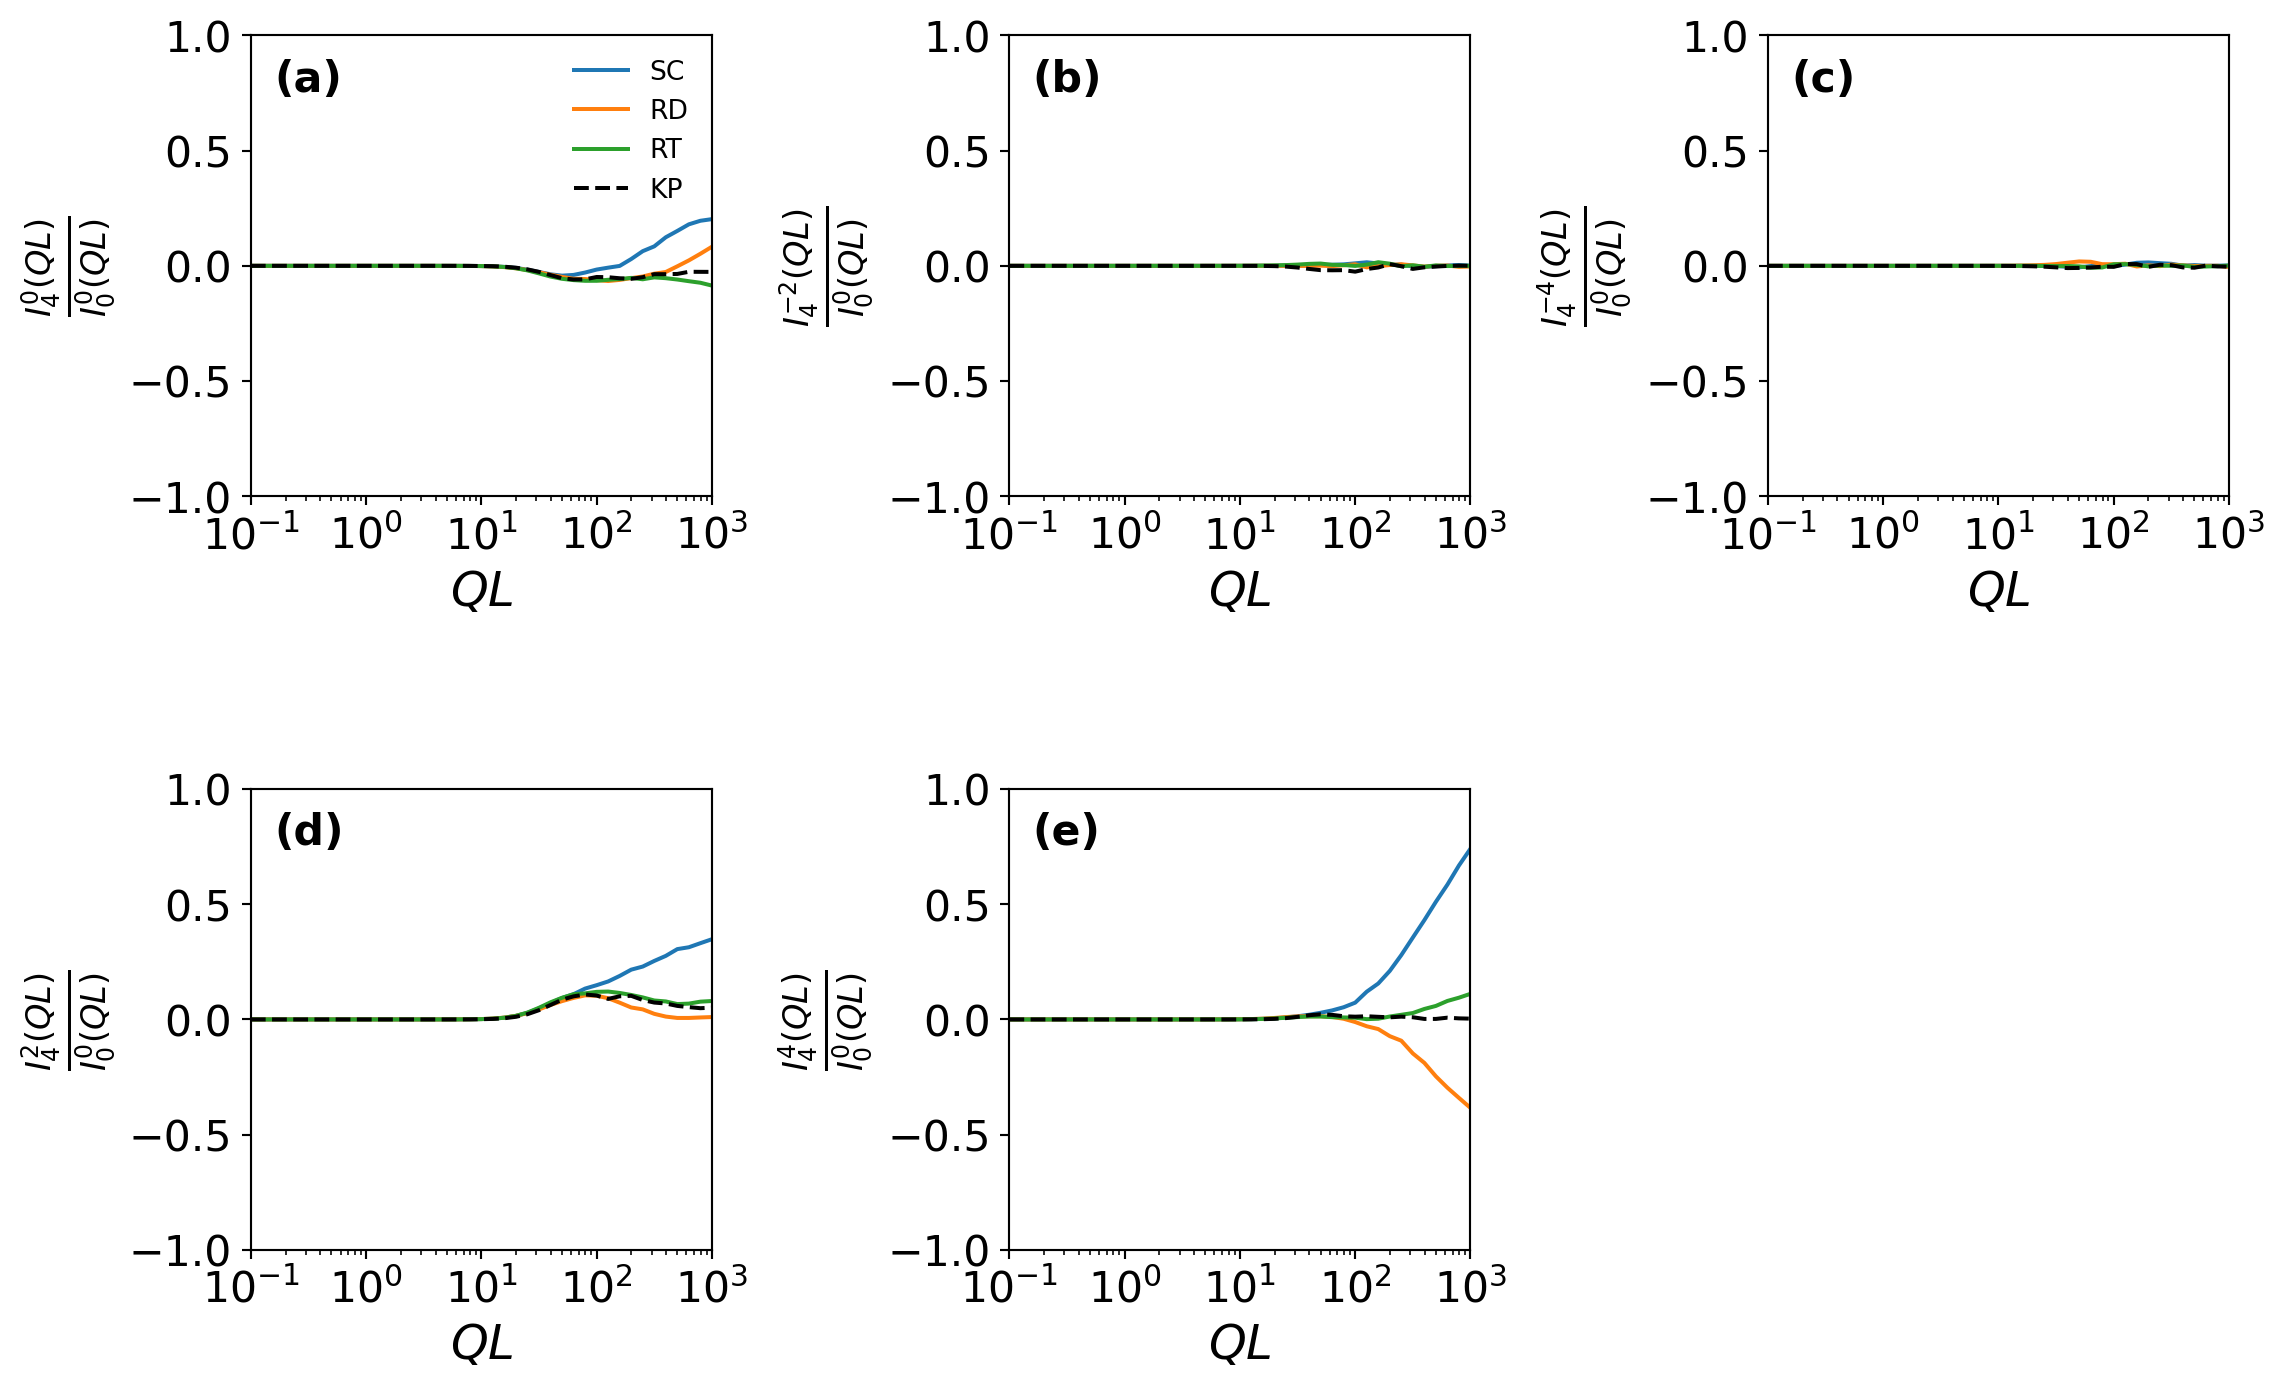

In [11]:
fig = plt.figure(figsize=(12, 8),dpi=192)
colors  = ['C0','C1','C2','C3','C4']

parameters_list = []
S_q_lm_list_param = []
g_r_lm_list_param = []
for kappa in kappa_list:
    for epsilon in epsilon_list:
        parameters_list.append([kappa, epsilon])
        n_sample = 512
        data = loadmat("./mat/sq_lm_xz_1.0_{}_{}_{}.mat".format(n_sample,kappa,epsilon))

S_q_lm_list_param = data['S_q_lm_list_param']
g_r_lm_list_param = data['g_r_lm_list_param']
rr = data['rr'][0]
qq = data['qq'][0]
lm_list = data['lm']

# for i, params in enumerate(parameters_list):
#     kappa = params[0]
#     epsilon = params[1]
#     for k, lm in enumerate(lm_list[1:]):
#         print(lm)
#         ax = fig.add_subplot(2,3,k+1)
#         for j, grid in enumerate(['SC','RD','RT']):
#             S_q_lm_list = S_q_lm_list_param[i][j,:]
#             S_q_lm = S_q_lm_list[:,k+1]
            
#             ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi), label=grid)
                
#         j=3
#         grid = 'KP'
#         S_q_lm_list = S_q_lm_list_param[i][j,:]
#         S_q_lm = S_q_lm_list[:,k+1]
        
#         ax.plot(qq*N_backbone,S_q_lm*np.sqrt(4*np.pi),'--k', label=grid)
#         ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
#         ax.set_xlabel(r'$QL$',fontsize=18)
#         ax.set_ylabel(r'$I_{l}^{m}(QL)$',fontsize=18)
#         ax.set_xscale('log')
#         ax.set_xlim([1e-1,1e3])
        
#         ax.tick_params(axis='y', which='major', labelsize=16)
#         ax.tick_params(axis='x', which='major', labelsize=16)
#         ax.set_ylim([-0.25,1])
#         if lm[0] == 0:
#             if i==len(parameters_list)-1:
#                 ax.plot(qq*N_backbone,np.pi/(qq*N_backbone),':',color='#C0C0C0',zorder=-10)
#                 ax.set_yscale('log')
#                 ax.set_ylim([1e-3,1.2])
#                 ax.set_xlim([1e-1,1e3])
#                 ax.legend(frameon=False, loc='lower left')
#         ax.set_box_aspect(1)

panels = ["(a)","(b)","(c)","(d)","(e)","(f)"]
titles = [r'$\frac{I_{4}^0(QL)}{I_{0}^0(QL)}$',r'$\frac{I_{4}^{-2}(QL)}{I_{0}^0(QL)}$',r'$\frac{I_{4}^{-4}(QL)}{I_{0}^0(QL)}$',r'$\frac{I_{4}^{2}(QL)}{I_{0}^0(QL)}$',r'$\frac{I_{4}^{4}(QL)}{I_{0}^0(QL)}$']
for i, params in enumerate(parameters_list):
    kappa = params[0]
    epsilon = params[1]
    position = 0
    for k, lm in enumerate(lm_list[1:]):
        if lm[0] < 4:
            continue
        print(lm)
        position += 1
        ax = fig.add_subplot(2,3,position)
        # ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        for j, grid in enumerate(['SC','RD','RT']):
            S_q_lm_list = S_q_lm_list_param[i][j,:]
            S_q_00 = S_q_lm_list[:,0]
            S_q_lm = S_q_lm_list[:,k+1]
            
            ax.plot(qq*N_backbone,S_q_lm/S_q_00, color=colors[j], label=grid)
                
        j=3
        S_q_lm_list = S_q_lm_list_param[i][j,:]
        S_q_lm = S_q_lm_list[:,k+1]
        S_q_00 = S_q_lm_list[:,0]
        
        ax.plot(qq*N_backbone,S_q_lm/S_q_00,'--k', label="KP")
        ax.text(0.05, 0.95, panels[position-1], transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')
        # ax.set_title(r'$l={}, m={}$'.format(*lm),fontsize=18)
        ax.set_xlabel(r'$QL$',fontsize=18)
        ax.set_ylabel(titles[position-1],fontsize=18)
        ax.set_xscale('log')
        ax.set_xlim([1e-1,1e3])
        ax.set_ylim([-1,1])
        
        ax.tick_params(axis='y', which='major', labelsize=16)
        ax.tick_params(axis='x', which='major', labelsize=16)
        ax.set_box_aspect(1)
        if position == 1:
            ax.legend(frameon=False)
            
plt.tight_layout()
